# 如何做金融数据统计？

## 目录
1. 什么是随机变量？
2. 金融有哪些常用的分布？
3. 什么是偏峰与峰态？
4. 如何做假设验证？

## 什么是随机变量？
### 1. 离散随机变量（Discrete Random Variables） 

摇一颗骰子100次，k次摇到6，k是随机变量，k的取值只能是自然数0，1，2，…，6而不能取小数3.5，因而k是离散型随机变量。

### 2. 连续随机变量（Continuous Random Variables） 

比如，公共汽车每15分钟一班，有100个人在站台等车时间x是个随机变量，x的取值范围是[0,15]，它是一个区间，从理论上说在这个区间内可取任一实数3.5、√20等，因而称这随机变量是连续型随机变量。

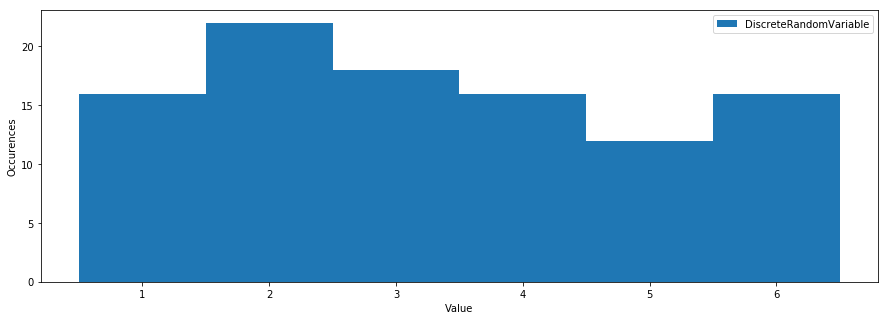

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DiscreteRandomVariable = np.random.randint(1, 7, 100)
fig = plt.figure(figsize=(15, 5))
plt.hist(DiscreteRandomVariable , bins = [1,2,3,4,5,6,7], align='left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['DiscreteRandomVariable'])
plt.show()

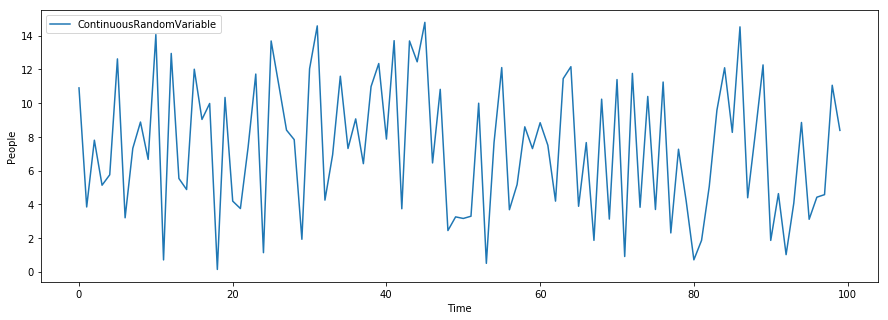

In [2]:
CRV = np.random.uniform(0, 15, 100)
fig = plt.figure(figsize=(15, 5))
plt.plot(CRV)
plt.xlabel('Time')
plt.ylabel('People')
plt.legend(['ContinuousRandomVariable'])
plt.show()

## 金融有哪些常用的分布？
### 二项分布(Binomial Distribution) 
投一个硬币，0.5概率向上，投了5次，重复50次，每一轮向上的次数有多少？

### 正态分布（Normal Distribution） 
服从一定的均值与标准差分布。

### t分布 （T-Distribution）
t分布概率密度曲线以0为中心，左右对称的单峰分布；期形态变化与自由度大小有关，自由度越小，分布越散，而自由度与样本量和变量数量有关。当自由度为30是，t分布已经接近标准的正太分布曲线,当自由度为120时，等于正太分布。一般自由度为1-30,40,50,...,120。与标准的正态分布相比，t分布呈现‘尖峰厚尾’的特点，更加符合收益分布的特点，因此在推断统计分析中常常会使用t分布。 

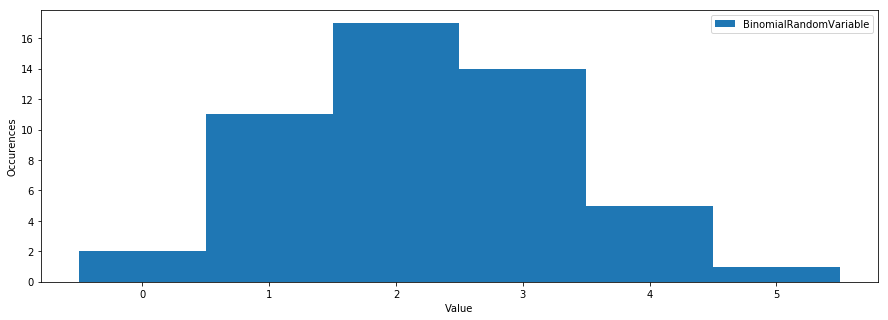

In [3]:
#二项分布(Binomial Distribution) 
BinomialRandomVariable = np.random.binomial(5, 0.50,50)
fig = plt.figure(figsize=(15, 5))
plt.hist(BinomialRandomVariable, bins = [0, 1, 2, 3, 4, 5, 6],align='left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['BinomialRandomVariable'])
plt.show()

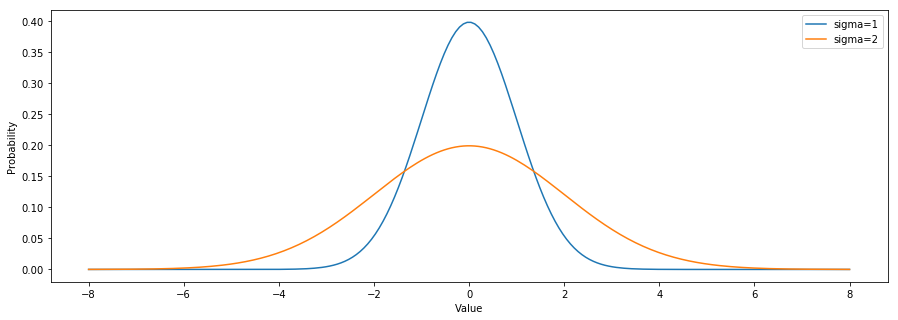

In [4]:
#正态分布（Normal Distribution） 

from scipy import stats
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = stats.norm.pdf(x,mu_1,sigma_1)
z = stats.norm.pdf(x,mu_2,sigma_2)
fig = plt.figure(figsize=(15, 5))
plt.plot(x, y, label='sigma=1')
plt.plot(x, z, label='sigma=2')

plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

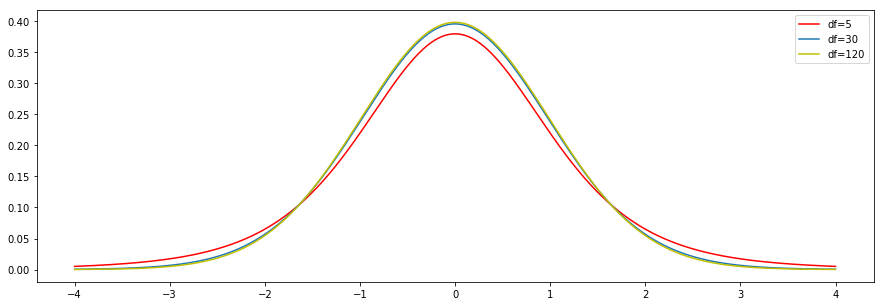

In [5]:
x = np.arange(-4,4.004,0.004)
fig = plt.figure(figsize=(15, 5))
plt.plot(x,stats.t.pdf(x, 5),'r', label='df=5')
plt.plot(x,stats.t.pdf(x, 30), label='df=30')
plt.plot(x,stats.t.pdf(x, 120),'y', label='df=120')
plt.legend()
plt.show()

## 什么是偏峰与峰态？
### 偏峰（Skewness）

一个对称的分布偏峰（skewness）的值为 0. 
正倾斜偏峰分布意味 mean > median > mode。 
负倾斜偏峰分布意味 mean < median < mode。

### 峰态（Kurtosis）
尖顶峰度Kurtosis>3

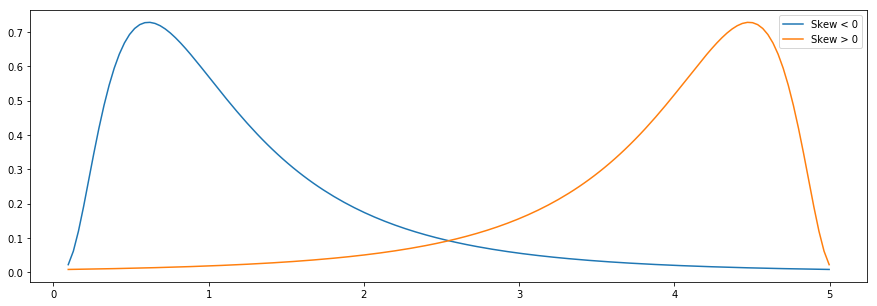

In [6]:
# 偏峰（Skewness）
# s是指shape=sigma, loc是mu。 
# lognorm.pdf(x, s, loc, scale)
x = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)
lognormal = stats.lognorm.pdf(x, .7)
fig = plt.figure(figsize=(15, 5))
plt.plot(x, lognormal, label='Skew < 0')
plt.plot(x, lognormal[::-1], label='Skew > 0')
plt.legend()
plt.show()

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.593762875598


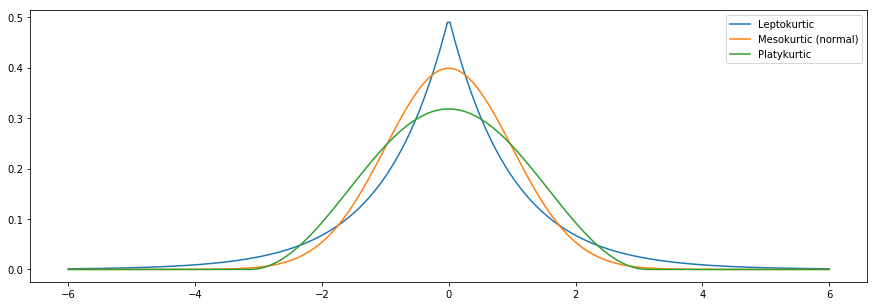

In [7]:
# 峰态（Kurtosis）
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
# Plot some example distributions
fig = plt.figure(figsize=(15, 5))
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print 'Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k'))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print 'Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k'))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print 'Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k'))
plt.legend()
plt.show()

Skew: -0.0844255630964
kurtosis: 2.86011789931


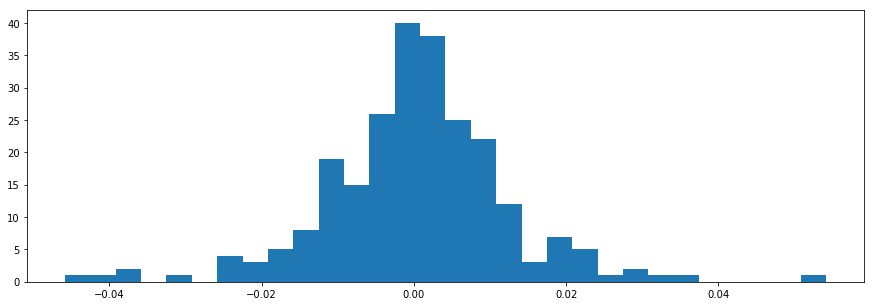

In [11]:
#计算600036的偏峰与峰态
import tushare as ts

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['returns'] = data['close'].pct_change()[1:]
returns = data['returns'].dropna()

print 'Skew:', stats.skew(returns)
print 'kurtosis:', stats.kurtosis(returns)
fig = plt.figure(figsize=(15, 5))
plt.hist(returns, 30)
plt.show()

## 如何做假设验证？
P-Value越小代表拒绝假设。
用JarqueBera检验是否正态分布，假设回报率是满足正态分布，然而当p_value<0.05则拒绝原假设，该股票回报率不为正态分布。

用t检验600036股票收益率均值是否为0，假设平均收益率为0，然而当p_value>0.05则无法拒绝原假设，该股票平均收益率为0。

In [12]:
import tushare as ts
from statsmodels.stats.stattools import jarque_bera

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()

returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print 'The returns are likely normal.'
else:
    print 'The returns are likely not normal.'

The returns are likely not normal.


In [13]:
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print 'The returns are likely 0.'
else:
    print 'The returns are likely not 0.'

The returns are likely 0.


## 作业
计算别只股票的分布偏峰与峰态